In [1]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO
from pynwb.image import ImageSeries
from pynwb.epoch import TimeIntervals

from sklearn.decomposition import PCA

In [2]:
# ----- SET UP FILE HANDLING -----

assay = 'introduction'
behavior = 'Sniff'

computer = 'Ernest'

match computer:
    case 'Dorian':
        nwbpath = 'M:\\scn2a-paper-GWJSNH\\NWB-files'
        
    case 'Ernest':
        nwbpath = 'C:\\Users\\nhogl\\Documents\\GitHub\\scn2a-paper-GWJSNH-code\\NWB'

allnwb = []
allnwb += [os.path.join(nwbpath,each) for each in os.listdir(nwbpath) if assay in each]

figp=os.path.join('figures','2024July') # where to save figures
saveplots=False

In [3]:
def consolidate_single_behavior_table(assay,behavior,nwbpath,printy):
    ''''''
    
    # collate all instances of behavior into a table
    # plot per individual cdf of time to behavior
    # normalize to total time doing that behavior
    # calculate as percent of assay time

    # make functions to generate table per assay x behavior

    FHet = 0
    MHet = 0
    FWT = 0
    MWT = 0
    
    allnwb = []
    allnwb += [os.path.join(nwbpath,each) for each in os.listdir(nwbpath) if assay in each]
    
    for i,fname in enumerate(allnwb):
                
        # open file
        io = NWBHDF5IO(os.path.join(nwbpath,fname), mode="r") # <-- open in write to append snippets?
        nwbfile = io.read()

        # for sanity check, print out the name of the file being handled
        pathsplit = fname.split('\\')
        recstem = pathsplit[-1].strip('.nwb')
        if printy:
            print(recstem)
            
        try:
            data = nwbfile.intervals[f'single_behavior_{behavior}'].to_dataframe()
            nrentries = data.shape[0]

            # add metadata
            pair_tag = fname.split('\\')[-1].split('_')[1] # label the pair the observation came from    
            massGT = [nwbfile.subject.genotype]*nrentries
            massPairtag = [pair_tag]*nrentries
            massSex = [nwbfile.subject.sex]*nrentries
            massColors = [nwbfile.lab_meta_data['vole_metadata'].colors[:]]*nrentries
            if np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='F'): 
                massWithinGroup = [FHet]*nrentries
                FHet+=1
            elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='F'): 
                massWithinGroup = [FWT]*nrentries
                FWT+=1
            elif np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='M'):
                massWithinGroup = [MHet]*nrentries
                MHet+=1
            elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='M'):
                massWithinGroup = [MWT]*nrentries
                MWT+=1

            # add columns
            data['pair_tag'] = massPairtag
            data['sex'] = massSex
            data['GT'] = massGT
            data['pair'] = massWithinGroup
            data['color'] = massColors

            # consolidate into one big dataframe
            if i==0:
                rundf = data
            else:
                rundf = pd.concat([rundf,data])
            
        except:
            print(f'No {behavior}')
            
    rundf['raw_cumes'] = rundf.groupby('pair_tag').duration.cumsum()
    rundf['cumes_assay_frac'] = rundf.raw_cumes/1800
    rundf['totals'] = rundf.groupby('pair_tag')['duration'].transform('sum')
    rundf['cumes_behav_frac'] = rundf.raw_cumes/rundf.totals
            
    return rundf

In [6]:
# collate all instances of behavior into a table
# plot per individual cdf of time to behavior
# normalize to total time doing that behavior
# calculate as percent of assay time

# make functions to generate table per assay x behavior

FHet = 0
MHet = 0
FWT = 0
MWT = 0

for i,fname in enumerate(allnwb):
    # open file
    io = NWBHDF5IO(os.path.join(nwbpath,fname), mode="r") # <-- open in write to append snippets?
    nwbfile = io.read()
    
    # for sanity check, print out the name of the file being handled
    pathsplit = fname.split('\\')
    recstem = pathsplit[-1].strip('.nwb')
    print(recstem)

    data = nwbfile.intervals[f'single_behavior_{behavior}'].to_dataframe()
    nrentries = data.shape[0]
    
    # add metadata
    pair_tag = fname.split('\\')[-1].split('_')[1] # label the pair the observation came from    
    massGT = [nwbfile.subject.genotype]*nrentries
    massPairtag = [pair_tag]*nrentries
    massSex = [nwbfile.subject.sex]*nrentries
    massColors = [nwbfile.lab_meta_data['vole_metadata'].colors[:]]*nrentries
    if np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='F'): 
        massWithinGroup = [FHet]*nrentries
        FHet+=1
    elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='F'): 
        massWithinGroup = [FWT]*nrentries
        FWT+=1
    elif np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='M'):
        massWithinGroup = [MHet]*nrentries
        MHet+=1
    elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='M'):
        massWithinGroup = [MWT]*nrentries
        MWT+=1

    # add columns
    data['pair_tag'] = massPairtag
    data['sex'] = massSex
    data['GT'] = massGT
    data['pair'] = massWithinGroup
    data['color'] = massColors
    
    # consolidate into one big dataframe
    if i==0:
        rundf = data
    else:
        rundf = pd.concat([rundf,data])
        


Nov22_Pair15_introductio
Nov22_Pair16_introductio
Nov22_Pair17_introductio
Nov22_Pair18_introductio
Nov22_Pair19_introductio
Nov22_Pair1_introductio
Nov22_Pair21_introductio
Nov22_Pair22_introductio
Nov22_Pair23_introductio
Nov22_Pair24_introductio
Nov22_Pair25_introductio
Nov22_Pair26_introductio
Nov22_Pair27_introductio
Nov22_Pair28_introductio
Nov22_Pair29_introductio
Nov22_Pair2_introductio
Nov22_Pair30_introductio
Nov22_Pair31_introductio
Nov22_Pair32_introductio
Nov22_Pair33_introductio
Nov22_Pair34_introductio
Nov22_Pair35_introductio
Nov22_Pair36_introductio
Nov22_Pair37_introductio
Nov22_Pair38_introductio
Nov22_Pair39_introductio
Nov22_Pair3_introductio
Nov22_Pair40_introductio
Nov22_Pair41_introductio
Nov22_Pair42_introductio
Nov22_Pair43_introductio
Nov22_Pair44_introductio
Nov22_Pair46_introductio
Nov22_Pair47_introductio
Nov22_Pair48_introductio
Nov22_Pair49_introductio
Nov22_Pair4_introductio
Nov22_Pair50_introductio
Nov22_Pair51_introductio
Nov22_Pair52_introductio
Nov2

In [12]:
rundf.head()

,start_time,stop_time,behavior,duration,atype,pair_tag,sex,GT,pair,color,raw_cumes
id,,,,,,,,,,,
4,45.483,49.233,Sniff,3.750,STATE,Pair15,F,Het,0,"[245.0, 201.0, 39.0]",3.750
30,248.983,250.483,Sniff,1.500,STATE,Pair15,F,Het,0,"[245.0, 201.0, 39.0]",5.250
32,250.981,252.233,Sniff,1.252,STATE,Pair15,F,Het,0,"[245.0, 201.0, 39.0]",6.502
34,252.734,257.233,Sniff,4.499,STATE,Pair15,F,Het,0,"[245.0, 201.0, 39.0]",11.001
36,258.734,259.029,Sniff,0.295,STATE,Pair15,F,Het,0,"[245.0, 201.0, 39.0]",11.296


In [32]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

In [23]:
# ----- ADD CUMULATIVE TIMES TO DATAFRAME -----
rundf['raw_cumes'] = rundf.groupby('pair_tag').duration.cumsum()
rundf['cumes_assay_frac'] = rundf.raw_cumes/1800
rundf['totals'] = rundf.groupby('pair_tag')['duration'].transform('sum')
rundf['cumes_behav_frac'] = rundf.raw_cumes/rundf.totals

Text(0.5, 1.02, 'Cumulative Sniff in introduction')

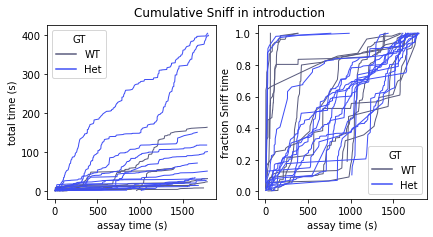

In [39]:
# ----- PLOT MALES -----

nrows=1
ncols=2
sex = 'M'

# make figure and subplots
f, ax = plt.subplots(nrows,ncols,figsize=(6, 3))
f.tight_layout()

ax0 = sns.lineplot(
    data=rundf[rundf.sex==sex],
    x="start_time", y="raw_cumes", hue="GT", units="pair",
    estimator=None, lw=1,palette=mpal,hue_order=ho,
    ax=ax[0],
)
ax0.set_xlabel('assay time (s)')
ax0.set_ylabel('total time (s)')


ax1 = sns.lineplot(
    data=rundf[rundf.sex=='M'],
    x="start_time", y="cumes_behav_frac", hue="GT", units="pair",
    estimator=None, lw=1,palette=mpal,hue_order=ho,
    ax=ax[1],
)
ax1.set_xlabel('assay time (s)')
ax1.set_ylabel(f'fraction {behavior} time')

f.suptitle(f'Cumulative {behavior} in {assay}', y=1.02)

Text(0.5, 1.02, 'Cumulative Investigate in introduction')

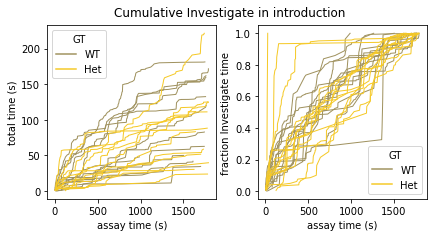

In [166]:
# ----- PLOT FEMALES -----

nrows=1
ncols=2
sex = 'F'

if sex=='M':
    usepal = mpal
else:
    usepal = fpal

# make figure and subplots
f, ax = plt.subplots(nrows,ncols,figsize=(6, 3))
f.tight_layout()

ax0 = sns.lineplot(
    data=rundf[rundf.sex==sex],
    x="start_time", y="raw_cumes", hue="GT", units="pair_tag",
    estimator=None, lw=1,palette=usepal,hue_order=ho,
    ax=ax[0],
)
ax0.set_xlabel('assay time (s)')
ax0.set_ylabel('total time (s)')


ax1 = sns.lineplot(
    data=rundf[rundf.sex==sex],
    x="start_time", y="cumes_behav_frac", hue="GT", units="pair_tag",
    estimator=None, lw=1,palette=usepal,hue_order=ho,
    ax=ax[1],
)
ax1.set_xlabel('assay time (s)')
ax1.set_ylabel(f'fraction {behavior} time')

f.suptitle(f'Cumulative {behavior} in {assay}', y=1.02)

In [30]:
def make_cumulative_time_plots(rundf,sex,behavior,assay):
    ''''''
    nrows=1
    ncols=2

    if sex=='M':
        usepal = mpal
    else:
        usepal = fpal

    # make figure and subplots
    f, ax = plt.subplots(nrows,ncols,figsize=(6, 3))
    f.tight_layout()

    ax0 = sns.lineplot(
        data=rundf[rundf.sex==sex],
        x="start_time", y="raw_cumes", hue="GT", units="pair_tag",
        estimator=None, lw=1,palette=usepal,hue_order=ho,
        ax=ax[0],
    )
    ax0.set_xlabel('assay time (s)')
    ax0.set_ylabel('total time (s)')


    ax1 = sns.lineplot(
        data=rundf[rundf.sex==sex],
        x="start_time", y="cumes_behav_frac", hue="GT", units="pair_tag",
        estimator=None, lw=1,palette=usepal,hue_order=ho,
        ax=ax[1],
    )
    ax1.set_xlabel('assay time (s)')
    ax1.set_ylabel(f'fraction {behavior} time')

    f.suptitle(f'Cumulative {behavior} in {assay}', y=1.02)

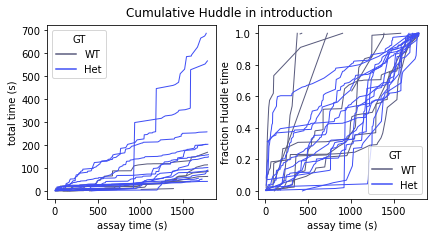

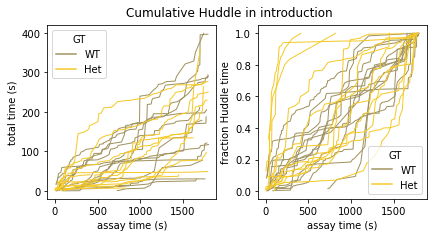

In [63]:
# ----- HUDDLE INTROS -----
assay = 'introduction'
behavior = 'Huddle'
printy = True
# InHudDF = consolidate_single_behavior_table(assay,behavior,nwbpath,printy)
# InHudDF['raw_cumes'] = InHudDF.groupby('pair_tag').duration.cumsum()
# InHudDF['cumes_assay_frac'] = InHudDF.raw_cumes/1800
# InHudDF['totals'] = InHudDF.groupby('pair_tag')['duration'].transform('sum')
# InHudDF['cumes_behav_frac'] = InHudDF.raw_cumes/InHudDF.totals
make_cumulative_time_plots(InHudDF,'M',behavior,assay)
make_cumulative_time_plots(InHudDF,'F',behavior,assay)

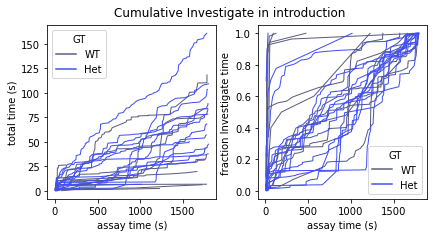

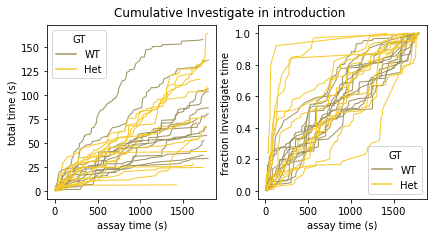

In [67]:
# ----- HUDDLE INVESTIGATE -----
assay = 'introduction'
behavior = 'Investigate'
printy = True
# InInvDF = consolidate_single_behavior_table(assay,behavior,nwbpath,printy)
# InInvDF['raw_cumes'] = InInvDF.groupby('pair_tag').duration.cumsum()
# InInvDF['cumes_assay_frac'] = InInvDF.raw_cumes/1800
# InInvDF['totals'] = InInvDF.groupby('pair_tag')['duration'].transform('sum')
# InInvDF['cumes_behav_frac'] = InInvDF.raw_cumes/InInvDF.totals
make_cumulative_time_plots(InInvDF,'M',behavior,assay)
make_cumulative_time_plots(InInvDF,'F',behavior,assay)

In [95]:
prosoc = pd.concat([rundf,InInvDF,InHudDF])
prosoc.pop('raw_cumes')
prosoc.pop('cumes_assay_frac')
prosoc.pop('totals')
prosoc.pop('cumes_behav_frac')
prosoc.pop('behavior')
prosoc.pop('stop_time')
prosoc.pop('atype')
prosoc = prosoc.sort_values(by=['pair_tag','start_time'])
prosoc['raw_cumes'] = prosoc.groupby('pair_tag').duration.cumsum()
prosoc['cumes_assay_frac'] = prosoc.raw_cumes/1800
prosoc['totals'] = prosoc.groupby('pair_tag')['duration'].transform('sum')
prosoc['cumes_behav_frac'] = prosoc.raw_cumes/prosoc.totals

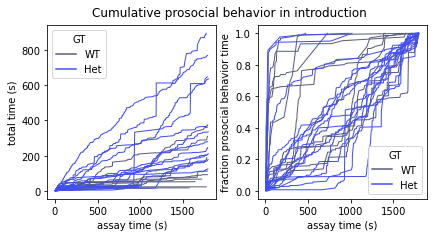

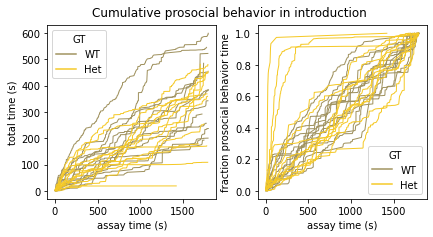

In [169]:
make_cumulative_time_plots(prosoc,'M','prosocial behavior',assay)
make_cumulative_time_plots(prosoc,'F','prosocial behavior',assay)

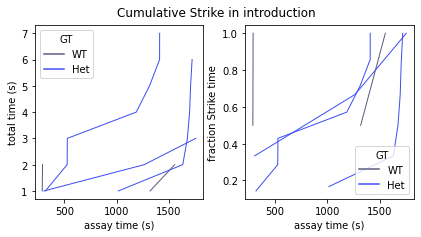

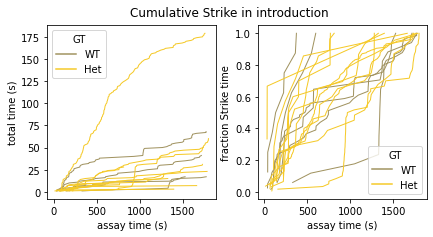

In [33]:
# ----- DO AGONISTIC BEHAVIOR POINT EVENTS -----

# ----- STRIKE INTROS -----
assay = 'introduction'
behavior = 'Strike'
printy = True
# InStrikeDF = consolidate_single_behavior_table(assay,behavior,nwbpath,printy)
InStrikeDF['ones'] = [1]*InStrikeDF.shape[0]
InStrikeDF['raw_cumes'] = InStrikeDF.groupby('pair_tag').ones.cumsum()# use numpy argsort on start_times
InStrikeDF['totals'] = InStrikeDF.groupby('pair_tag')['ones'].transform('sum')
InStrikeDF['cumes_behav_frac'] = InStrikeDF.raw_cumes/InStrikeDF.totals
make_cumulative_time_plots(InStrikeDF,'M',behavior,assay)
make_cumulative_time_plots(InStrikeDF,'F',behavior,assay)

Nov22_Pair15_introductio
Nov22_Pair16_introductio
No Tussle
Nov22_Pair17_introductio
No Tussle
Nov22_Pair18_introductio
No Tussle
Nov22_Pair19_introductio
No Tussle
Nov22_Pair1_introductio
No Tussle
Nov22_Pair21_introductio
No Tussle
Nov22_Pair22_introductio
No Tussle
Nov22_Pair23_introductio
Nov22_Pair24_introductio
Nov22_Pair25_introductio
No Tussle
Nov22_Pair26_introductio
No Tussle
Nov22_Pair27_introductio
No Tussle
Nov22_Pair28_introductio
No Tussle
Nov22_Pair29_introductio
No Tussle
Nov22_Pair2_introductio
Nov22_Pair30_introductio
Nov22_Pair31_introductio
No Tussle
Nov22_Pair32_introductio
No Tussle
Nov22_Pair33_introductio
No Tussle
Nov22_Pair34_introductio
No Tussle
Nov22_Pair35_introductio
No Tussle
Nov22_Pair36_introductio
No Tussle
Nov22_Pair37_introductio
No Tussle
Nov22_Pair38_introductio
Nov22_Pair39_introductio
Nov22_Pair3_introductio
Nov22_Pair40_introductio
No Tussle
Nov22_Pair41_introductio
No Tussle
Nov22_Pair42_introductio
Nov22_Pair43_introductio
No Tussle
Nov22_Pa

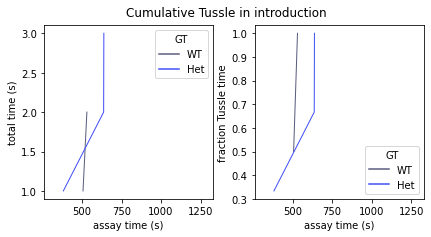

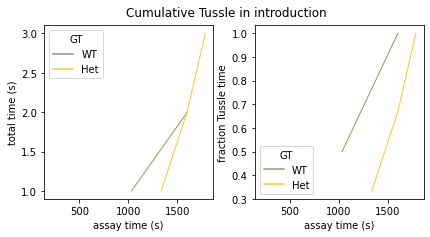

In [35]:
# -----  INTROS -----
assay = 'introduction'
behavior = 'Tussle'
printy = True
InTussleDF = consolidate_single_behavior_table(assay,behavior,nwbpath,printy)
InTussleDF['ones'] = [1]*InTussleDF.shape[0]
InTussleDF['raw_cumes'] = InTussleDF.groupby('pair_tag').ones.cumsum()# use numpy argsort on start_times
InTussleDF['totals'] = InTussleDF.groupby('pair_tag')['ones'].transform('sum')
InTussleDF['cumes_behav_frac'] = InTussleDF.raw_cumes/InTussleDF.totals
make_cumulative_time_plots(InTussleDF,'M',behavior,assay)
make_cumulative_time_plots(InTussleDF,'F',behavior,assay)

Nov22_Pair15_introductio
Nov22_Pair16_introductio
Nov22_Pair17_introductio
Nov22_Pair18_introductio
Nov22_Pair19_introductio
Nov22_Pair1_introductio
Nov22_Pair21_introductio
Nov22_Pair22_introductio
Nov22_Pair23_introductio
Nov22_Pair24_introductio
Nov22_Pair25_introductio
No Defensive strike
Nov22_Pair26_introductio
Nov22_Pair27_introductio
No Defensive strike
Nov22_Pair28_introductio
Nov22_Pair29_introductio
Nov22_Pair2_introductio
No Defensive strike
Nov22_Pair30_introductio
Nov22_Pair31_introductio
Nov22_Pair32_introductio
No Defensive strike
Nov22_Pair33_introductio
Nov22_Pair34_introductio
Nov22_Pair35_introductio
Nov22_Pair36_introductio
Nov22_Pair37_introductio
Nov22_Pair38_introductio
Nov22_Pair39_introductio
Nov22_Pair3_introductio
Nov22_Pair40_introductio
Nov22_Pair41_introductio
Nov22_Pair42_introductio
Nov22_Pair43_introductio
No Defensive strike
Nov22_Pair44_introductio
Nov22_Pair46_introductio
Nov22_Pair47_introductio
No Defensive strike
Nov22_Pair48_introductio
No Defen

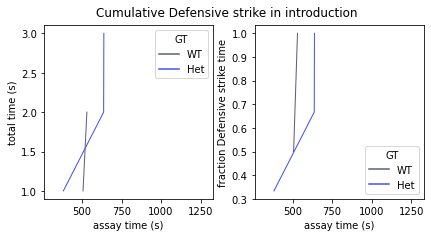

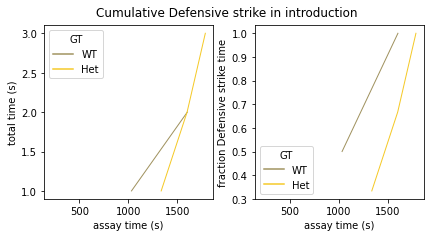

In [36]:
# -----  INTROS -----
assay = 'introduction'
behavior = 'Defensive strike'
printy = True
InDefDF = consolidate_single_behavior_table(assay,behavior,nwbpath,printy)
InDefDF['ones'] = [1]*InDefDF.shape[0]
InDefDF['raw_cumes'] = InDefDF.groupby('pair_tag').ones.cumsum()# use numpy argsort on start_times
InDefDF['totals'] = InDefDF.groupby('pair_tag')['ones'].transform('sum')
InDefDF['cumes_behav_frac'] = InDefDF.raw_cumes/InDefDF.totals
make_cumulative_time_plots(InTussleDF,'M',behavior,assay)
make_cumulative_time_plots(InTussleDF,'F',behavior,assay)

In [38]:
antisoc = pd.concat([InStrikeDF,InTussleDF,InDefDF])
antisoc.pop('raw_cumes')
antisoc.pop('cumes_assay_frac')
antisoc.pop('totals')
antisoc.pop('cumes_behav_frac')
antisoc.pop('behavior')
antisoc.pop('stop_time')
antisoc.pop('atype')
antisoc = antisoc.sort_values(by=['pair_tag','start_time'])
antisoc['ones'] = [1]*antisoc.shape[0]
antisoc['raw_cumes'] = antisoc.groupby('pair_tag').ones.cumsum()# use numpy argsort on start_times
antisoc['totals'] = antisoc.groupby('pair_tag')['ones'].transform('sum')
antisoc['cumes_behav_frac'] = antisoc.raw_cumes/antisoc.totals

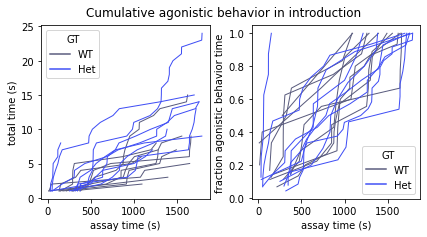

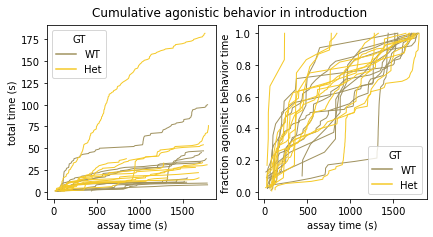

In [40]:
make_cumulative_time_plots(antisoc,'M','agonistic behavior',assay)
make_cumulative_time_plots(antisoc,'F','agonistic behavior',assay)